In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Read the dataframe
df = pd.read_csv("dataframe.csv")

# Drop any rows with missing values
df = df.dropna()

# Split the data into input features (X) and target variable (y)
X = df.drop("y", axis=1).values
y = df["y"].values

In [18]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

#oversampler = RandomOverSampler(random_state=42)
#X_res, y_res = oversampler.fit_resample(X,y)

In [19]:
# Encode the target variable using LabelEncoder and one-hot encoding
label_encoder = LabelEncoder()
y_res = label_encoder.fit_transform(y_res)
y_res = to_categorical(y_res)

In [23]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

def build_resnet(input_shape):
    inputs = keras.Input(shape=input_shape)

    x = layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    residual = layers.Conv2D(64, kernel_size=(1, 1), padding='same')(inputs)
    x = layers.add([x, residual])
    x = layers.Activation('relu')(x)

    # Add more residual blocks here...

    x = layers.GlobalAveragePooling2D()(x)
    outputs = layers.Dense(12, activation='softmax')(x)

    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

In [24]:
input_shape = (78,1,1 )  # Shape of each sample in X

model = build_resnet(input_shape)
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [25]:
# Train the model
model.fit(X_train, y_train, batch_size=20, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50


ValueError: in user code:

    File "C:\Users\jkaszyda\.conda\envs\DeepLearning\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\jkaszyda\.conda\envs\DeepLearning\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\jkaszyda\.conda\envs\DeepLearning\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\jkaszyda\.conda\envs\DeepLearning\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\jkaszyda\.conda\envs\DeepLearning\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\jkaszyda\.conda\envs\DeepLearning\lib\site-packages\keras\engine\input_spec.py", line 253, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'model_2' (type Functional).
    
    Input 0 of layer "conv2d_4" is incompatible with the layer: expected min_ndim=4, found ndim=2. Full shape received: (None, 78)
    
    Call arguments received by layer 'model_2' (type Functional):
      • inputs=tf.Tensor(shape=(None, 78), dtype=int64)
      • training=True
      • mask=None


In [14]:
import numpy as np
y_pred = model.predict(X_test)

y_pred_classes = []
y_real_classes = []

for item in y_pred:
    y_pred_classes.append(np.argmax(item))

for item in y_test:
    y_real_classes.append(np.argmax(item))
    
print(y_pred_classes[0])
print(y_real_classes[0])
# Assuming your classes are labeled from 0 to 25
predicted_class = np.argmax(y_pred[0])
probability = y_pred[0][predicted_class]

print("Predicted class:", predicted_class)
print("Probability:", probability)

100/100 [==============================] - 0s 2ms/step
0
2
Predicted class: 0
Probability: 0.88064224


In [15]:
import numpy as np
from sklearn.metrics import classification_report

print(classification_report(y_real_classes, y_pred_classes))

              precision    recall  f1-score   support

           0       0.19      0.92      0.31       280
           1       0.92      0.42      0.58       253
           2       0.98      0.70      0.82       290
           3       0.63      0.54      0.58       277
           4       0.67      0.06      0.11       269
           5       0.74      0.87      0.80       247
           6       0.00      0.00      0.00       259
           7       0.57      0.42      0.48       251
           8       0.46      0.83      0.59       251
           9       0.83      0.49      0.62       266
          10       0.10      0.04      0.05       244
          11       0.63      0.07      0.12       284

    accuracy                           0.45      3171
   macro avg       0.56      0.45      0.42      3171
weighted avg       0.56      0.45      0.42      3171



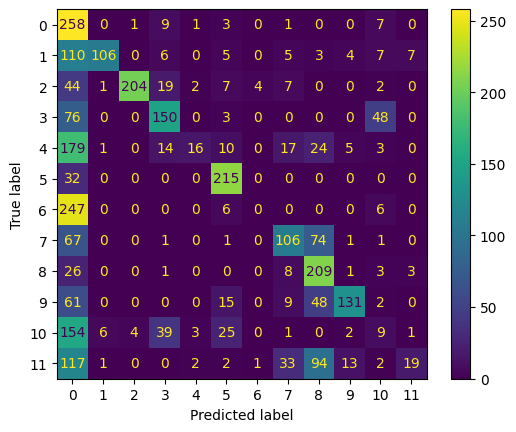

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_real_classes, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()